In [ ]:
import pandas as pd
import os

folder = 'aclImdb'

labels = {'pos':1, 'neg':0}

df = pd.DataFrame()

for f in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
df.columns = ['review', 'sentiment']

df.to_csv('movie_data.csv', index=False, encoding='utf-8')
df.head()

## previous steps

In [1]:
import pandas as pd
df = pd.read_csv('movie_data.csv')
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [2]:
import nltk

## need to download only once
## after install the module nltk
#nltk.download('punkt')

from nltk.tokenize import word_tokenize

reviews = df.review.str.cat(sep=' ')

tokens = word_tokenize(reviews)

In [3]:
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[0:50]

194777


['the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

In [4]:
## same here. after install the module nltk
## we need to download the corpus 
## run only the first time
#nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tokens2 = [w for w in tokens if w not in stop_words]
frequency_dist2 = nltk.FreqDist(tokens2)
sorted(frequency_dist2, key=frequency_dist2.__getitem__, reverse=True)[0:50]

[',',
 '.',
 '/',
 '>',
 '<',
 'br',
 'I',
 "'s",
 'The',
 'movie',
 'film',
 ')',
 '(',
 "''",
 "n't",
 '``',
 '!',
 'one',
 'like',
 'It',
 '?',
 'This',
 'good',
 'would',
 'time',
 'really',
 'see',
 'even',
 'story',
 "'",
 '...',
 ':',
 '-',
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'well',
 'first',
 'made',
 'also',
 'make',
 'way',
 'movies',
 'But',
 'think',
 'characters',
 '*']

In [5]:
## looks like the previous steps don't do what I expect
## we have to exclude the punctuations as much as we can
## now use the RegexpTokenizer

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tokens3 = tokenizer.tokenize(reviews)

frequency_dist3 = nltk.FreqDist(tokens3)
sorted(frequency_dist3, key=frequency_dist3.__getitem__, reverse=True)[0:50]


['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'br',
 'in',
 'I',
 'it',
 'that',
 's',
 'this',
 'was',
 'The',
 'movie',
 'as',
 'with',
 'for',
 'film',
 'but',
 't',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 'one',
 'he',
 'at',
 'by',
 'all',
 'an',
 'who',
 'they',
 'from',
 'like',
 'It',
 'so',
 'or',
 'about',
 'out',
 'her',
 'just',
 'has',
 'This',
 'some',
 'good']

In [6]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


tokens4 = [w for w in tokens3 if w not in stop_words]
frequency_dist4 = nltk.FreqDist(tokens4)
sorted(frequency_dist4, key=frequency_dist4.__getitem__, reverse=True)[0:50]

['br',
 'I',
 'The',
 'movie',
 'film',
 'one',
 'like',
 'It',
 'This',
 'good',
 'time',
 'would',
 'story',
 'really',
 'see',
 'even',
 'much',
 'well',
 'get',
 'bad',
 'people',
 'great',
 'made',
 'first',
 'make',
 'also',
 'could',
 'way',
 'movies',
 'But',
 'characters',
 'think',
 'character',
 'films',
 'And',
 'seen',
 'A',
 'watch',
 'plot',
 'many',
 'two',
 'acting',
 'know',
 'life',
 'never',
 'There',
 'show',
 'love',
 'In',
 'little']

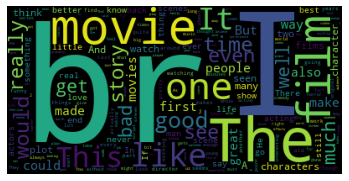

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist4)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 10000) (25000, 10000)


In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [11]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.84188
